In [1]:
import pysodb 
import scanpy as sc

from collections import defaultdict

sodb = pysodb.SODB()

adata_list = []
feature_list = []
label_list = []
label = []

for rank in [1, 2, 3, 4]:
    experiment = 'E15.5_E1S{}.MOSTA'.format(rank)
    adata = sodb.load_experiment('chen2022spatiotemporal', experiment)
    adata = sc.pp.subsample(adata, n_obs=10000, random_state=0, copy=True)
    sc.pp.normalize_total(adata)
    sc.pp.log1p(adata)
    adata.obsm['spatial'] = adata.obsm['spatial'] - adata.obsm['spatial'].mean(axis=0)
    adata.obs['label'] = str(rank)
    adata.obs['batch'] = 'E15.5'
    adata_list.append(adata)

load experiment[E15.5_E1S1.MOSTA] in dataset[chen2022spatiotemporal]
load experiment[E15.5_E1S2.MOSTA] in dataset[chen2022spatiotemporal]
load experiment[E15.5_E1S3.MOSTA] in dataset[chen2022spatiotemporal]
load experiment[E15.5_E1S4.MOSTA] in dataset[chen2022spatiotemporal]


In [2]:
import pysodb 
import scanpy as sc

from collections import defaultdict

sodb = pysodb.SODB()

adata_list_new = []
feature_list = []
label_list = []
label = []

for rank in [1, 2, 3, 4]:
    experiment = 'E16.5_E1S{}.MOSTA'.format(rank)
    adata = sodb.load_experiment('chen2022spatiotemporal', experiment)
    adata = sc.pp.subsample(adata, n_obs=10000, random_state=0, copy=True)
    sc.pp.normalize_total(adata)
    sc.pp.log1p(adata)
    adata.obsm['spatial'] = adata.obsm['spatial'] - adata.obsm['spatial'].mean(axis=0)
    adata.obs['label'] = str(rank)
    adata.obs['batch'] = 'E16.5'
    adata_list_new.append(adata)

load experiment[E16.5_E1S1.MOSTA] in dataset[chen2022spatiotemporal]
load experiment[E16.5_E1S2.MOSTA] in dataset[chen2022spatiotemporal]
load experiment[E16.5_E1S3.MOSTA] in dataset[chen2022spatiotemporal]
load experiment[E16.5_E1S4.MOSTA] in dataset[chen2022spatiotemporal]


In [ ]:
from river.river import River
from river.preprocess import do_slat_pair, get_the_feature, seed_everything
import numpy as np

seed_everything(42)

matching_list = []

for i, adata in enumerate(adata_list[1:]):
    _, best =  do_slat_pair(adata_list[0], adata, feature='pca')
    matching_list.append(best[0])
    
gene_expression, spatial, y, overlap = get_the_feature(adata_list, matching_list)

model = River(gene_expression=gene_expression, spatial=spatial, label=y)

model.train(epoch=100)

ig_attribution, dl_attribution, sl_attribution = model.attribution()
model.summary_attribution(ig_attribution, dl_attribution, sl_attribution, overlap)
model.return_top_k_gene(top_k=200)


np.save('final_rank_3d', model.final_rank.index.values)
np.save('ig_3d', model.scores_ig)
np.save('dl_3d', model.scores_dl)
np.save('sl_3d', model.scores_sl)

/data/civy/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


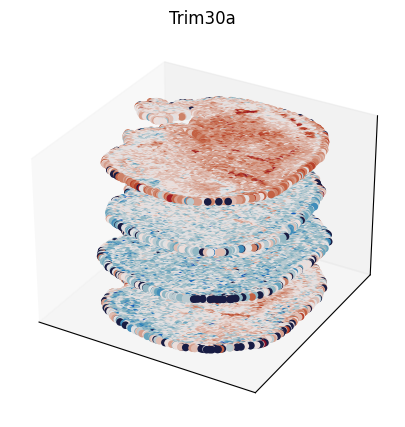

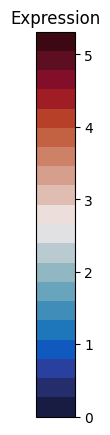

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


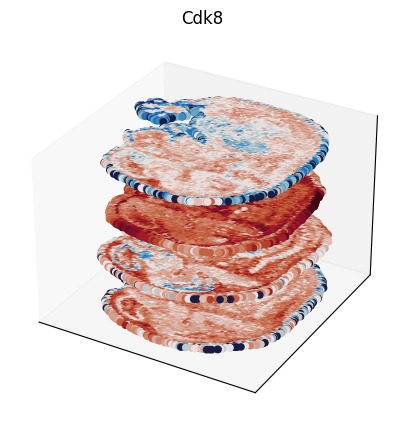

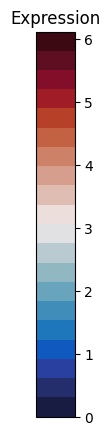

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


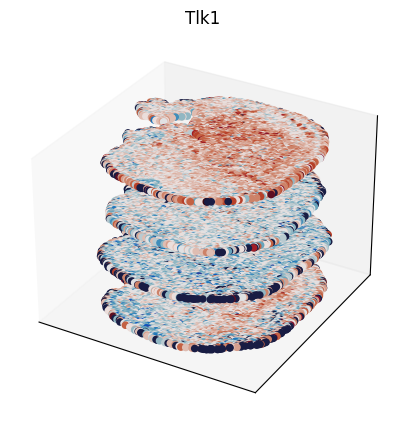

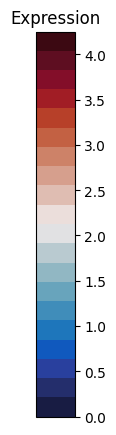

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import anndata as ad
from scipy.spatial import ConvexHull

final_ranks = np.load('final_rank_3d.npy', allow_pickle=True)
our_genes = final_ranks[:20]

from palettable.colorbrewer.diverging import Spectral_11

from palettable.cmocean.diverging import Delta_20, Balance_20

from matplotlib.colors import  ListedColormap


def plot_scatter_3d(x, y, z, color_data, title, z_indices, index):
    """
    Plots a 3D scatter plot with specified indices for each Z plane highlighted in black.
    
    Parameters:
    - x, y, z: Coordinates for the scatter plot.
    - color_data: Color data for the scatter points.
    - title: Title of the plot.
    - z_indices: Dictionary of indices for each Z plane to be highlighted.
    """
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection='3d')

    norm = plt.Normalize(color_data.min(), color_data.max())
    # Plot all points, with specified indices highlighted
    cmap = ListedColormap(Balance_20.mpl_colors)
    scatter = ax.scatter(x, y, z, c=color_data, cmap=cmap, depthshade=False, norm=norm)
    
    ax.set_title(title)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_zlabel('')
    fig_colorbar, ax_colorbar = plt.subplots(figsize=(0.5, 5))
    plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=ax_colorbar)
    ax_colorbar.set_title('Expression')
    plt.show()

z_index = {}
for i, adata in enumerate(adata_list):
    z = i 
    z_index[z] = (adata.obs['annotation'] == 'Liver').values

adata_3d = ad.concat(adata_list, label='slice_id')

x, y, z = adata_3d.obsm['spatial'][...,0], adata_3d.obsm['spatial'][...,1], np.array([0] * 10000 + [1] * 10000 + [2] * 10000 + [3] * 10000) 

plot_scatter_3d(x, y, z, adata_3d[:, our_genes[0]].X.toarray().flatten(), our_genes[0], z_index, 0)

plot_scatter_3d(x, y, z, adata_3d[:, our_genes[1]].X.toarray().flatten(), our_genes[1], z_index, 1)

plot_scatter_3d(x, y, z, adata_3d[:, our_genes[2]].X.toarray().flatten(), our_genes[2], z_index, 2)


<frozen importlib._bootstrap>:241: RuntimeWarning: pyarrow._fs.FileInfo size changed, may indicate binary incompatibility. Expected 64 from C header, got 88 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: pyarrow._fs.FileSelector size changed, may indicate binary incompatibility. Expected 48 from C header, got 72 from PyObject


/data/civy/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/data/civy/miniconda3/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
/data/civy/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/data/civy/miniconda3/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
/data/civy/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation

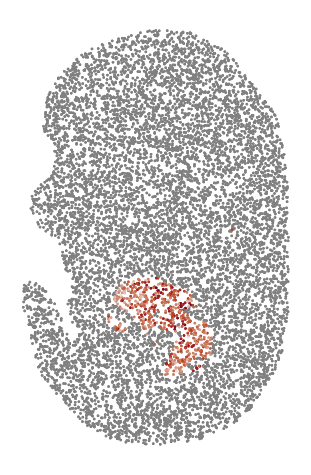

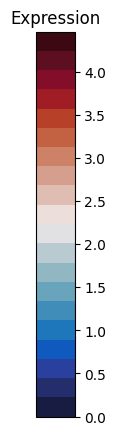

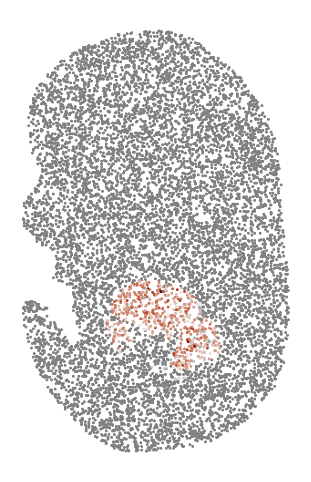

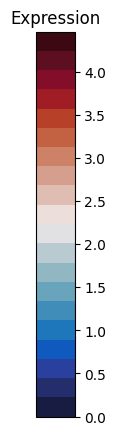

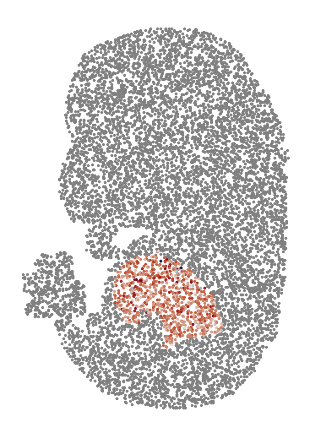

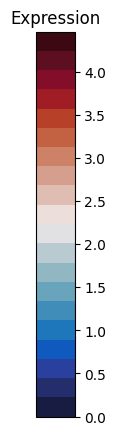

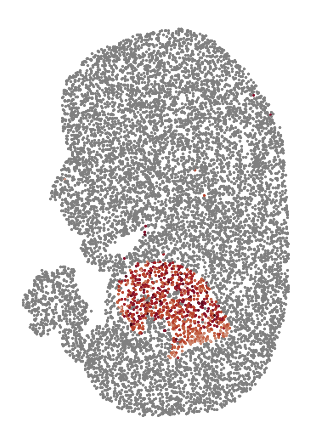

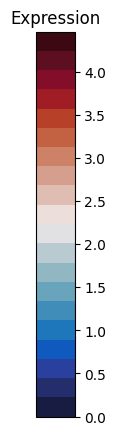

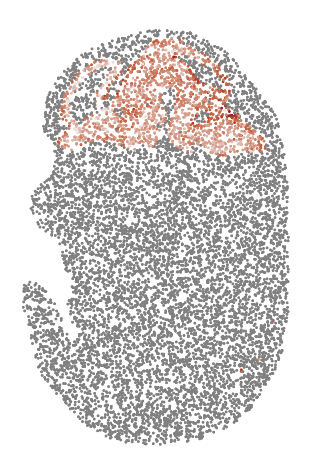

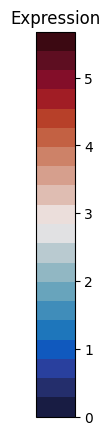

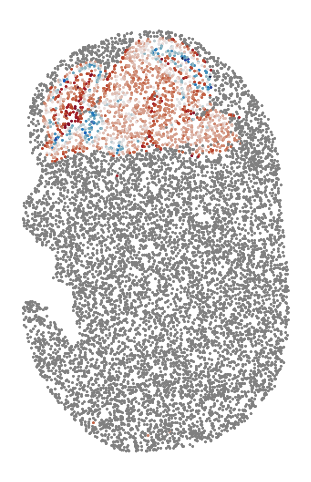

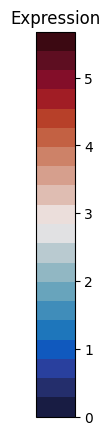

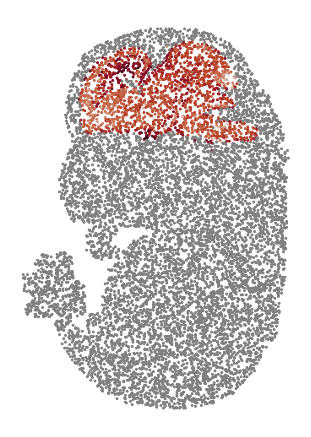

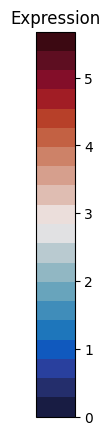

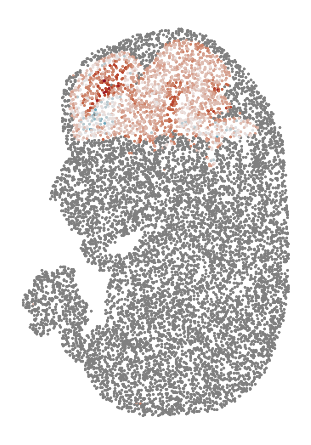

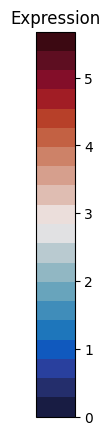

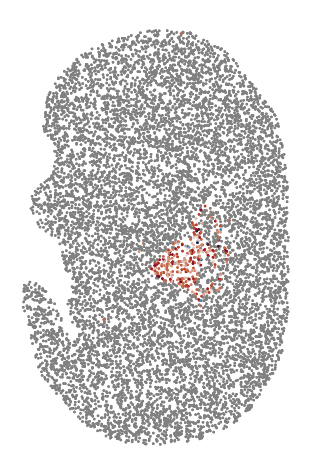

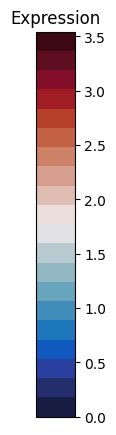

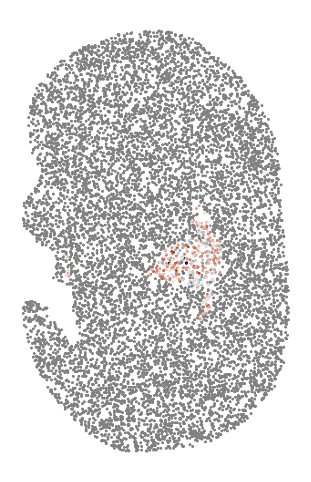

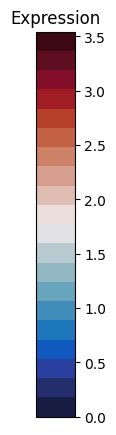

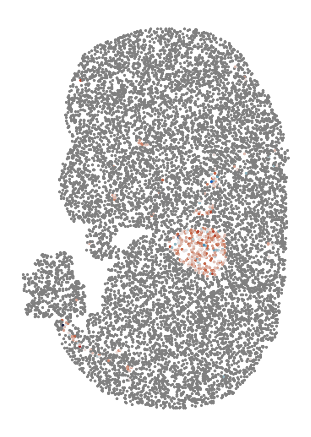

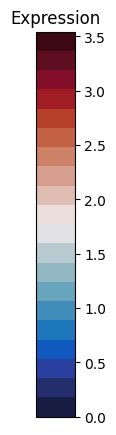

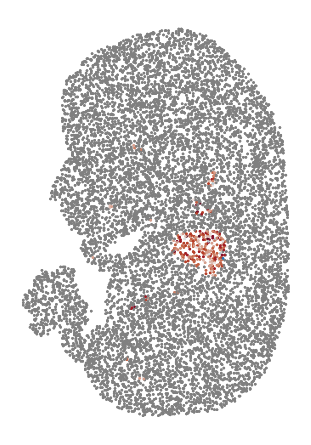

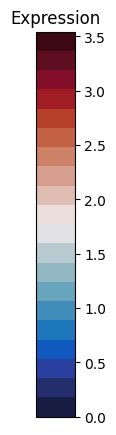

In [4]:
import anndata as ad
import squidpy as sq
from palettable.colorbrewer.diverging import Spectral_11
from matplotlib.colors import  ListedColormap


from palettable.cmocean.diverging import Balance_20

final_ranks = np.load('final_rank_3d.npy', allow_pickle=True)
our_genes = final_ranks[:3]

def draw_gene(adata_3d, gene, annotation, index):
    cmap = ListedColormap(Balance_20.mpl_colors)
    norm = plt.Normalize(adata_3d[adata_3d.obs['annotation'] == annotation,gene].X.min(), adata_3d[adata_3d.obs['annotation'] == annotation, gene].X.max())
    adata_3d[adata_3d.obs['annotation'] != annotation, gene].X = np.nan
    for s in adata_3d.obs['slice_id'].unique():
        ax= sq.pl.spatial_scatter(adata_3d, shape=None, library_key='slice_id', library_id=[s], color=[gene], norm=norm, ncols=1, na_color='gray', return_ax=True, figsize=(3,5), colorbar=False, cmap=cmap)
        ax.set_title('') 
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.axis('off')
        fig_colorbar, ax_colorbar = plt.subplots(figsize=(0.5, 5))
        plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=ax_colorbar)
        ax_colorbar.set_title('Expression')


adata_3d = ad.concat(adata_list, label='slice_id')

draw_gene(adata_3d, our_genes[0], 'Liver', 0)

adata_3d = ad.concat(adata_list, label='slice_id')

draw_gene(adata_3d, our_genes[1], 'Brain', 1)

adata_3d = ad.concat(adata_list, label='slice_id')

draw_gene(adata_3d, our_genes[2], 'Heart', 2)

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import anndata as ad
import scanpy as sc

label_palette = ['#f3f6ed', '#a9c1c8', '#abd064', '#a1cfe6', '#b68e96', '#eebab8', '#EDB11A', '#D75515']

# Assuming 'final_ranks', 'adata_list', 'our_genes_first', 'our_genes_last' are defined
final_ranks = np.load('final_rank_3d.npy', allow_pickle=True)

# Splitting the genes into two sets for demonstration
our_genes_first = final_ranks[:20]
our_genes_last = final_ranks[-20:]

# Concatenating and preprocessing the first dataset
adata_3d_first = ad.concat(adata_list, label='slice_id')[:, our_genes_first]
sc.pp.neighbors(adata_3d_first)
sc.tl.umap(adata_3d_first, n_components=3)


# Concatenating and preprocessing the second dataset
adata_3d_second = ad.concat(adata_list, label='slice_id')  # Using all genes for simplicity
sc.pp.neighbors(adata_3d_second)
sc.tl.umap(adata_3d_second, n_components=3)


# Concatenating and preprocessing the third dataset
adata_3d_third = ad.concat(adata_list, label='slice_id')[:, our_genes_last]
sc.pp.neighbors(adata_3d_third)
sc.tl.umap(adata_3d_third, n_components=3)


# Define a color map for slice_id categories


/data/civy/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/data/civy/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/data/civy/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
2024-06-22 14:25:15.704242: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-22 14:25:16.040151: I tensorflow/core/platfo

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


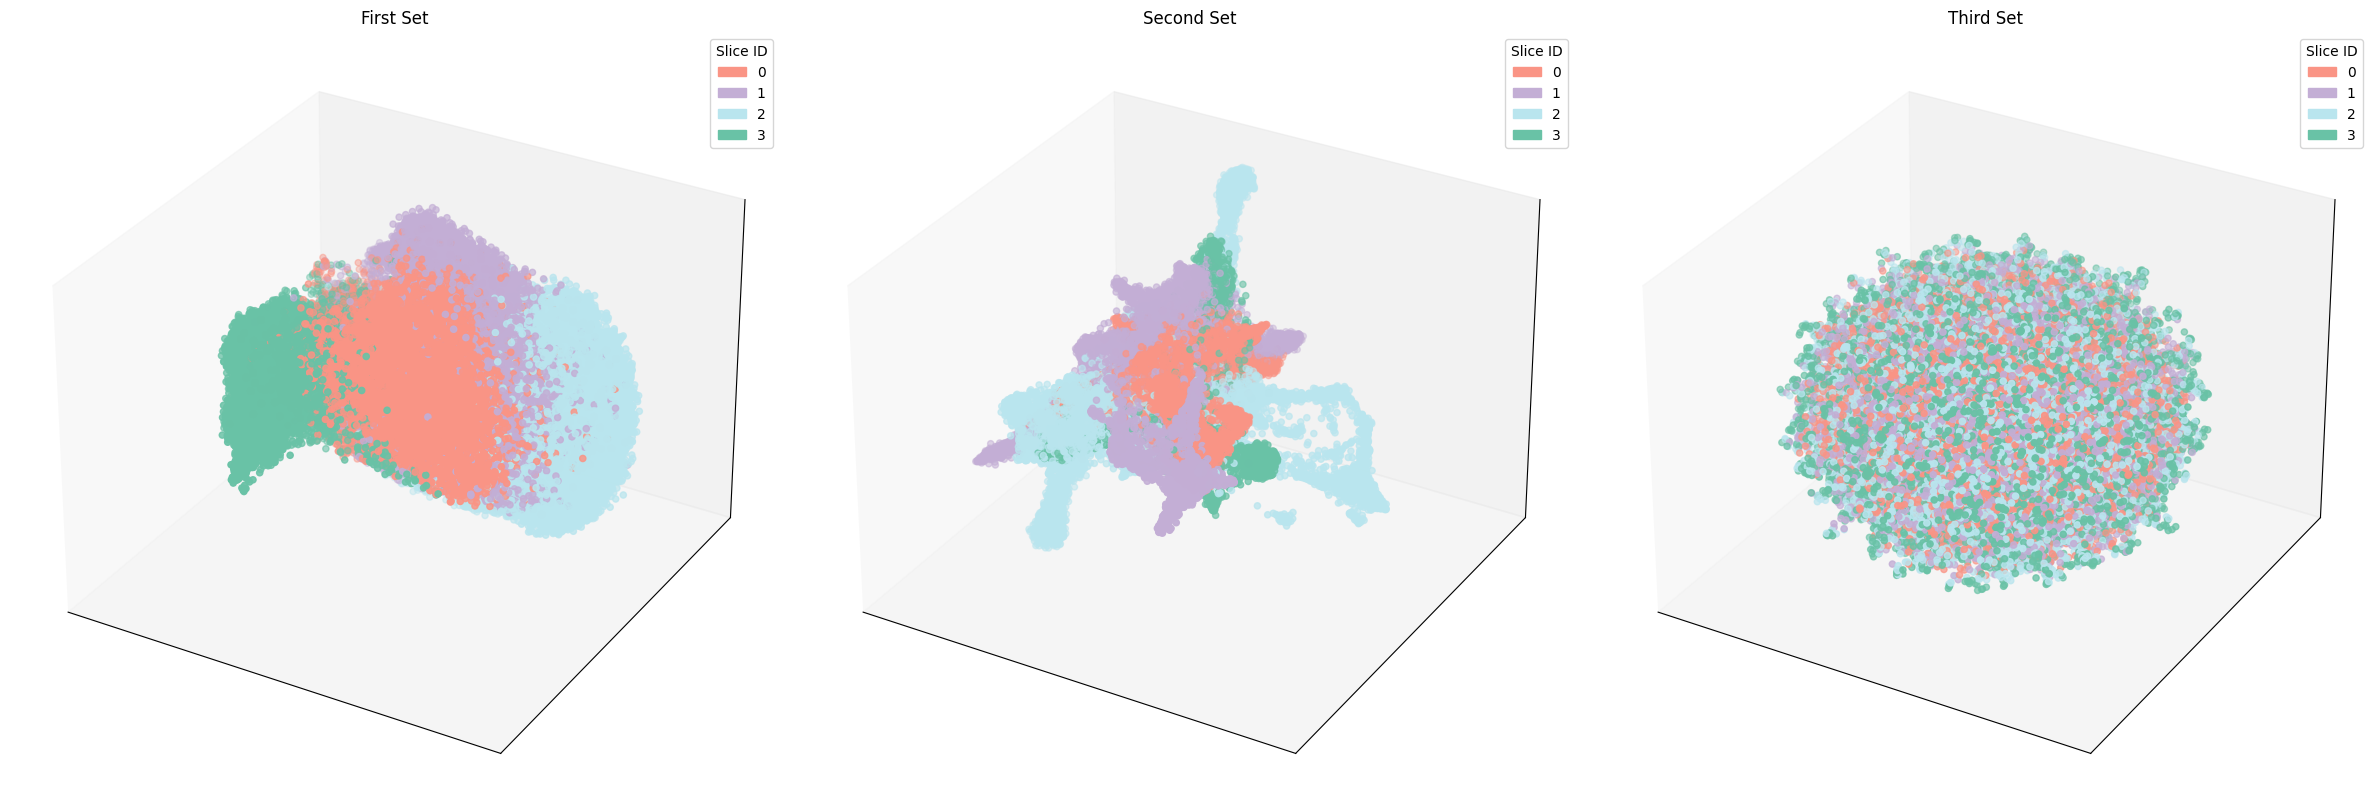

In [14]:
# Assuming there are 4 unique slice_id values, map them to 4 predefined colors
color_map = {0: '#FA9485', 1:'#C3AED5', 2: '#B9E5EE', 3: '#69C2A6'}
# You might need to adjust this mapping based on the actual slice_id values

fig = plt.figure(figsize=(24, 8))

# Helper function to scatter plot
def scatter_plot(ax, data, title):
    x, y, z = data.obsm['X_umap'].T
    colors = [color_map[code] for code in data.obs['slice_id'].cat.codes]
    scatter = ax.scatter(x, y, z, c=colors)
    
    # Create a legend
    import matplotlib.patches as mpatches
    legend_patches = [mpatches.Patch(color=color, label=label) for label, color in color_map.items()]
    ax.legend(handles=legend_patches, title="Slice ID")

    ax.grid(False)  # Remove grid lines
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_zlabel('')

# Plotting each subplot with the helper function
scatter_plot(fig.add_subplot(131, projection='3d'), adata_3d_first, "First Set")
scatter_plot(fig.add_subplot(132, projection='3d'), adata_3d_second, "Second Set")
scatter_plot(fig.add_subplot(133, projection='3d'), adata_3d_third, "Third Set")

plt.tight_layout()
plt.show()


In [15]:
import matplotlib.pyplot as plt
import numpy as np
import anndata as ad
import scanpy as sc

# Assuming 'final_ranks', 'adata_list', 'our_genes_first', 'our_genes_last' are defined
final_ranks = np.load('final_rank_3d.npy', allow_pickle=True)

# Splitting the genes into two sets for demonstration
our_genes_first = final_ranks[:20]
our_genes_last = final_ranks[-20:]

# Concatenating and preprocessing the first dataset
adata_3d_first = ad.concat(adata_list_new, label='slice_id')[:, our_genes_first]
sc.pp.neighbors(adata_3d_first)
sc.tl.umap(adata_3d_first, n_components=3)

# Concatenating and preprocessing the second dataset
adata_3d_second = ad.concat(adata_list_new, label='slice_id')  # Using all genes for simplicity
sc.pp.neighbors(adata_3d_second)
sc.tl.umap(adata_3d_second, n_components=3)

# Concatenating and preprocessing the third dataset
adata_3d_third = ad.concat(adata_list_new, label='slice_id')[:, our_genes_last]
sc.pp.neighbors(adata_3d_third)
sc.tl.umap(adata_3d_third, n_components=3)

# Define a color map for slice_id categories
# Assuming there are 4 unique slice_id values, map them to 4 predefined colors

/data/civy/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/data/civy/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/data/civy/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/data/civy/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/data/civy/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


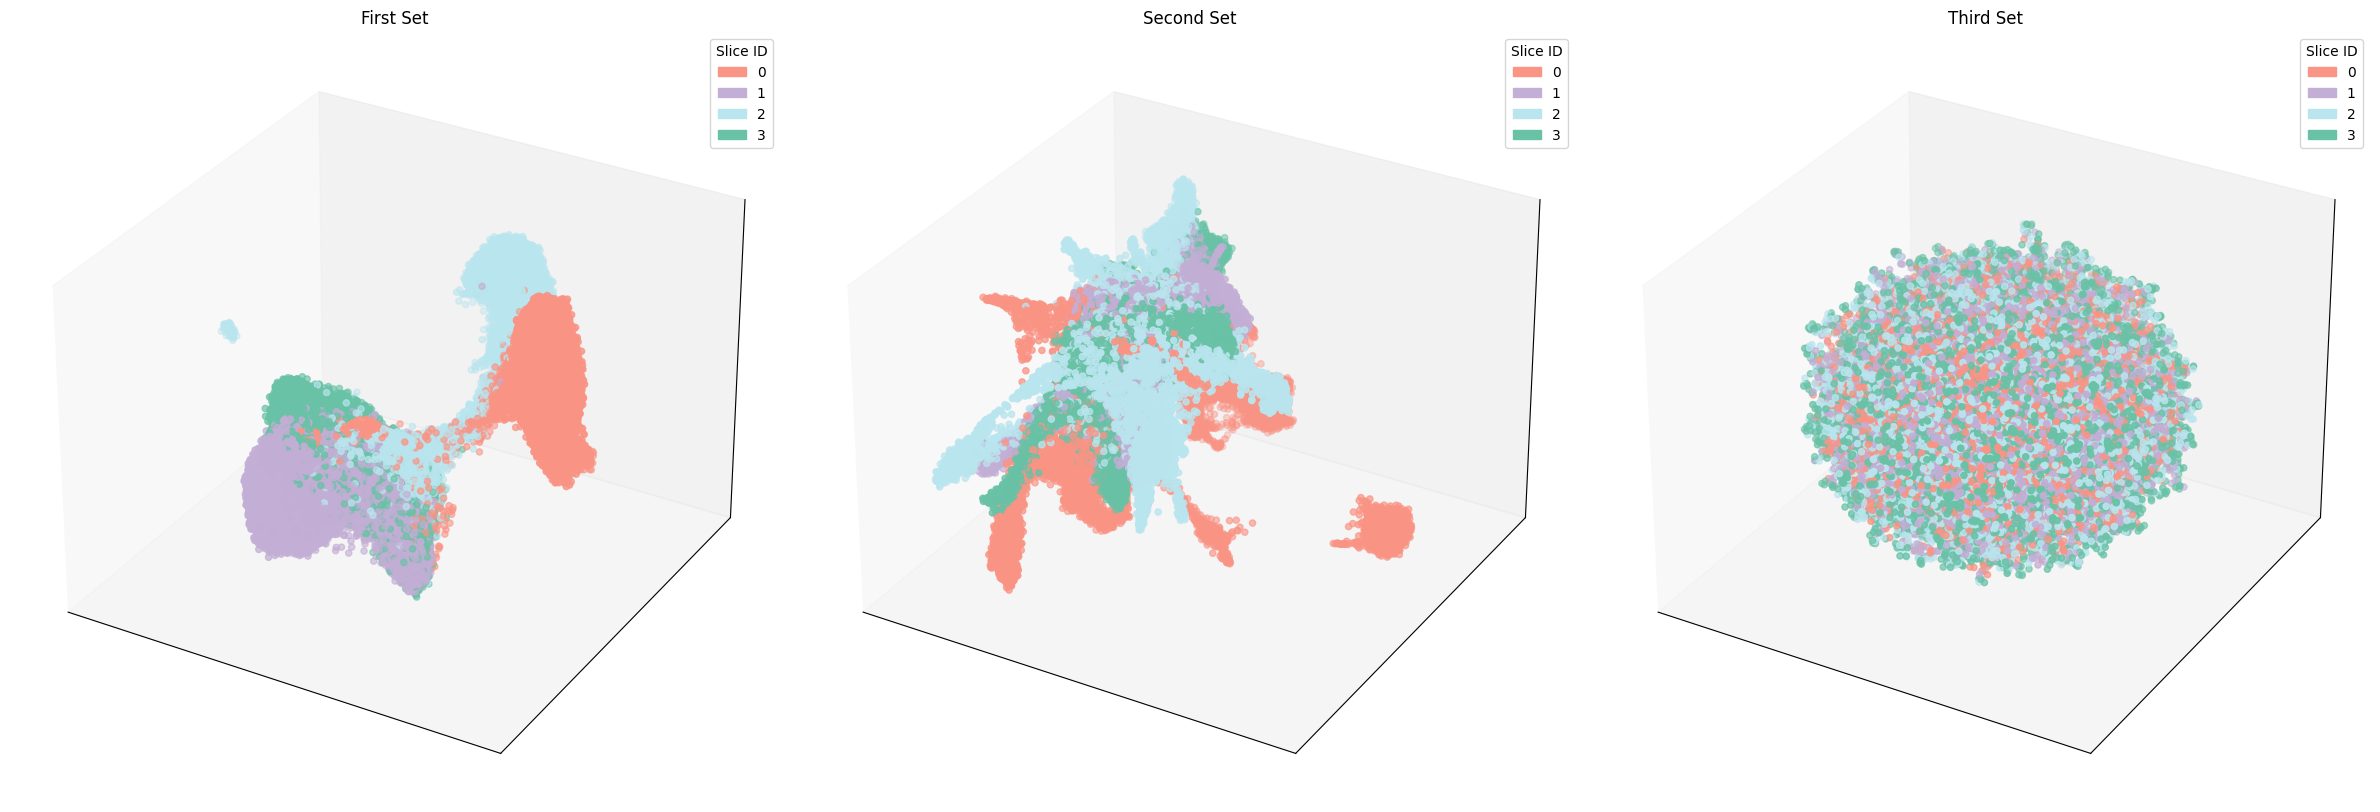

In [16]:
color_map = {0: '#FA9485', 1:'#C3AED5', 2: '#B9E5EE', 3: '#69C2A6'}
# You might need to adjust this mapping based on the actual slice_id values

fig = plt.figure(figsize=(24, 8))

# Helper function to scatter plot
def scatter_plot(ax, data, title):
    x, y, z = data.obsm['X_umap'].T
    colors = [color_map[code] for code in data.obs['slice_id'].cat.codes]
    scatter = ax.scatter(x, y, z, c=colors)
    
    # Create a legend
    import matplotlib.patches as mpatches
    legend_patches = [mpatches.Patch(color=color, label=label) for label, color in color_map.items()]
    ax.legend(handles=legend_patches, title="Slice ID")

    ax.grid(False)  # Remove grid lines
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_zlabel('')

# Plotting each subplot with the helper function
scatter_plot(fig.add_subplot(131, projection='3d'), adata_3d_first, "First Set")
scatter_plot(fig.add_subplot(132, projection='3d'), adata_3d_second, "Second Set")
scatter_plot(fig.add_subplot(133, projection='3d'), adata_3d_third, "Third Set")

plt.tight_layout()
plt.show()

In [17]:
color_map = {0: '#FA9485', 1:'#C3AED5', 2: '#B9E5EE', 3: '#69C2A6'}
batch_map = { }

In [18]:
import anndata as ad 

import scanpy.external as sce

import scib 

ari_list = []
nmi_list = []
gc_list = []
ig_list = []
sb_list = []

def get_metrics(adata_20):
    sc.pp.neighbors(adata_20, use_rep='X_pca_harmony')
    scib.me.cluster_optimal_resolution(adata_20, cluster_key="cluster", label_key="label")
    ari = scib.me.ari(adata_20, cluster_key="cluster", label_key="label")
    nmi = scib.me.nmi(adata_20, cluster_key="cluster", label_key="label")
    gc = scib.me.graph_connectivity(adata_20, label_key="label")
    ig = scib.me.ilisi_graph(adata_20, batch_key='batch', type_='embed', use_rep='X_pca_harmony')
    sb  = scib.me.silhouette_batch(adata_20, batch_key="batch", label_key="label", embed="X_pca_harmony")
    return  ari, nmi, gc, ig, sb

final_ranks = np.load('final_rank_3d.npy', allow_pickle=True)

adata = ad.concat(adata_list + adata_list_new, label='slice_id')

adata_full = adata.copy()

adata.obs['label'] = adata.obs['label'].astype('category')
adata.obs['batch'] = adata.obs['batch'].astype('category')

adata_5 = adata[:, final_ranks[:5]].copy()
sc.pp.pca(adata_5)
sce.pp.harmony_integrate(adata_5, 'batch')
ari, nmi, gc, ig, sb = get_metrics(adata_5)
print(ari, nmi, gc, ig, sb)
ari_list.append(ari)
nmi_list.append(nmi)
gc_list.append(gc)
ig_list.append(ig)
sb_list.append(sb)

adata_10 = adata[:, final_ranks[:10]].copy()
sc.pp.pca(adata_10)
sce.pp.harmony_integrate(adata_10, 'batch')
ari, nmi, gc, ig, sb = get_metrics(adata_10)
print(ari, nmi, gc, ig, sb)
ari_list.append(ari)
nmi_list.append(nmi)
gc_list.append(gc)
ig_list.append(ig)
sb_list.append(sb)

adata_15 = adata[:, final_ranks[:15]].copy()
sc.pp.pca(adata_15)
sce.pp.harmony_integrate(adata_15, 'batch')
ari, nmi, gc, ig, sb = get_metrics(adata_15)
print(ari, nmi, gc, ig, sb)
ari_list.append(ari)
nmi_list.append(nmi)
gc_list.append(gc)
ig_list.append(ig)
sb_list.append(sb)

adata_20 = adata[:, final_ranks[:20]].copy()
sc.pp.pca(adata_20)
sce.pp.harmony_integrate(adata_20, 'batch')
ari, nmi, gc, ig, sb = get_metrics(adata_20)
print(ari, nmi, gc, ig, sb)
ari_list.append(ari)
nmi_list.append(nmi)
gc_list.append(gc)
ig_list.append(ig)
sb_list.append(sb)

adata_b_5 = adata[:, final_ranks[-5:]].copy()
sc.pp.pca(adata_b_5)
sce.pp.harmony_integrate(adata_b_5, 'batch')
ari, nmi, gc, ig, sb = get_metrics(adata_b_5)
print(ari, nmi, gc, ig, sb)
ari_list.append(ari)
nmi_list.append(nmi)
gc_list.append(gc)
ig_list.append(ig)
sb_list.append(sb)

adata_full.obs['label'] = adata_full.obs['label'].astype('category')
adata_full.obs['batch'] = adata_full.obs['batch'].astype('category')

sc.pp.pca(adata_full)
sce.pp.harmony_integrate(adata_full, 'batch')
ari, nmi, gc, ig, sb = get_metrics(adata_full)
print(ari, nmi, gc, ig, sb)
ari_list.append(ari)
nmi_list.append(nmi)
gc_list.append(gc)
ig_list.append(ig)
sb_list.append(sb)

/data/civy/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/data/civy/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/data/civy/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
2024-06-22 14:43:17,094 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-06-22 14:43:29,630 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-06-22 14:43:30,366 - harmonypy - INFO - Iteration 1 of 10
2024-06-22 14:44:07,661 - harmonypy - INFO - Iteration 2 of 10
2024-06-22 14:44:43,533 - harmonypy - I

resolution: 0.1, nmi: 0.2815470893333828
resolution: 0.2, nmi: 0.23059736664958225
resolution: 0.3, nmi: 0.22318610246530168
resolution: 0.4, nmi: 0.21575508692914203
resolution: 0.5, nmi: 0.20472568179711323
resolution: 0.6, nmi: 0.19944074866004488
resolution: 0.7, nmi: 0.20706969001395603
resolution: 0.8, nmi: 0.1924469174879557
resolution: 0.9, nmi: 0.19467618766561684
resolution: 1.0, nmi: 0.19090839631009165
resolution: 1.1, nmi: 0.18628869187414598
resolution: 1.2, nmi: 0.18168064323612954
resolution: 1.3, nmi: 0.1820973223990335
resolution: 1.4, nmi: 0.182484472107999
resolution: 1.5, nmi: 0.17739488383401877
resolution: 1.6, nmi: 0.1864800981635023
resolution: 1.7, nmi: 0.18432340544500508
resolution: 1.8, nmi: 0.1850946797903497
resolution: 1.9, nmi: 0.19157657915281132
resolution: 2.0, nmi: 0.18551444211984594
optimised clustering against label
optimal cluster resolution: 0.1
optimal score: 0.2815470893333828


/data/civy/miniconda3/lib/python3.10/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/data/civy/miniconda3/lib/python3.10/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/data/civy/miniconda3/lib/python3.10/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and t

mean silhouette per group:        silhouette_score
group                  
1              0.887130
2              0.900186
3              0.895301
4              0.951929
0.22817543948050414 0.28154708933338285 0.9930125 0.8804862719807116 0.9086364359959617


"adata_20 = adata[:, final_ranks[-5:]].copy()\nsc.pp.pca(adata_20)\nsce.pp.harmony_integrate(adata_20, 'batch')\nari, nmi, gc, ig, sb = get_metrics(adata_20)\nprint(ari, nmi, gc, ig, sb)\nari_list.append(ari)\nnmi_list.append(nmi)\ngc_list.append(gc)\nig_list.append(ig)\nsb_list.append(sb)\n\nadata_full.obs['label'] = adata_full.obs['label'].astype('category')\nadata_full.obs['batch'] = adata_full.obs['batch'].astype('category')\n\nsc.pp.pca(adata_full)\nsce.pp.harmony_integrate(adata_full, 'batch')\nari, nmi, gc, ig, sb = get_metrics(adata_full)\nprint(ari, nmi, gc, ig, sb)\nari_list.append(ari)\nnmi_list.append(nmi)\ngc_list.append(gc)\nig_list.append(ig)\nsb_list.append(sb)"

/data/civy/miniconda3/lib/python3.10/site-packages/scanpy-1.9.3-py3.10.egg/scanpy/plotting/_tools/scatterplots.py:163: PendingDeprecationWarning: The get_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/data/civy/miniconda3/lib/python3.10/site-packages/scanpy-1.9.3-py3.10.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/data/civy/miniconda3/lib/python3.10/site-packages/scanpy-1.9.3-py3.10.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


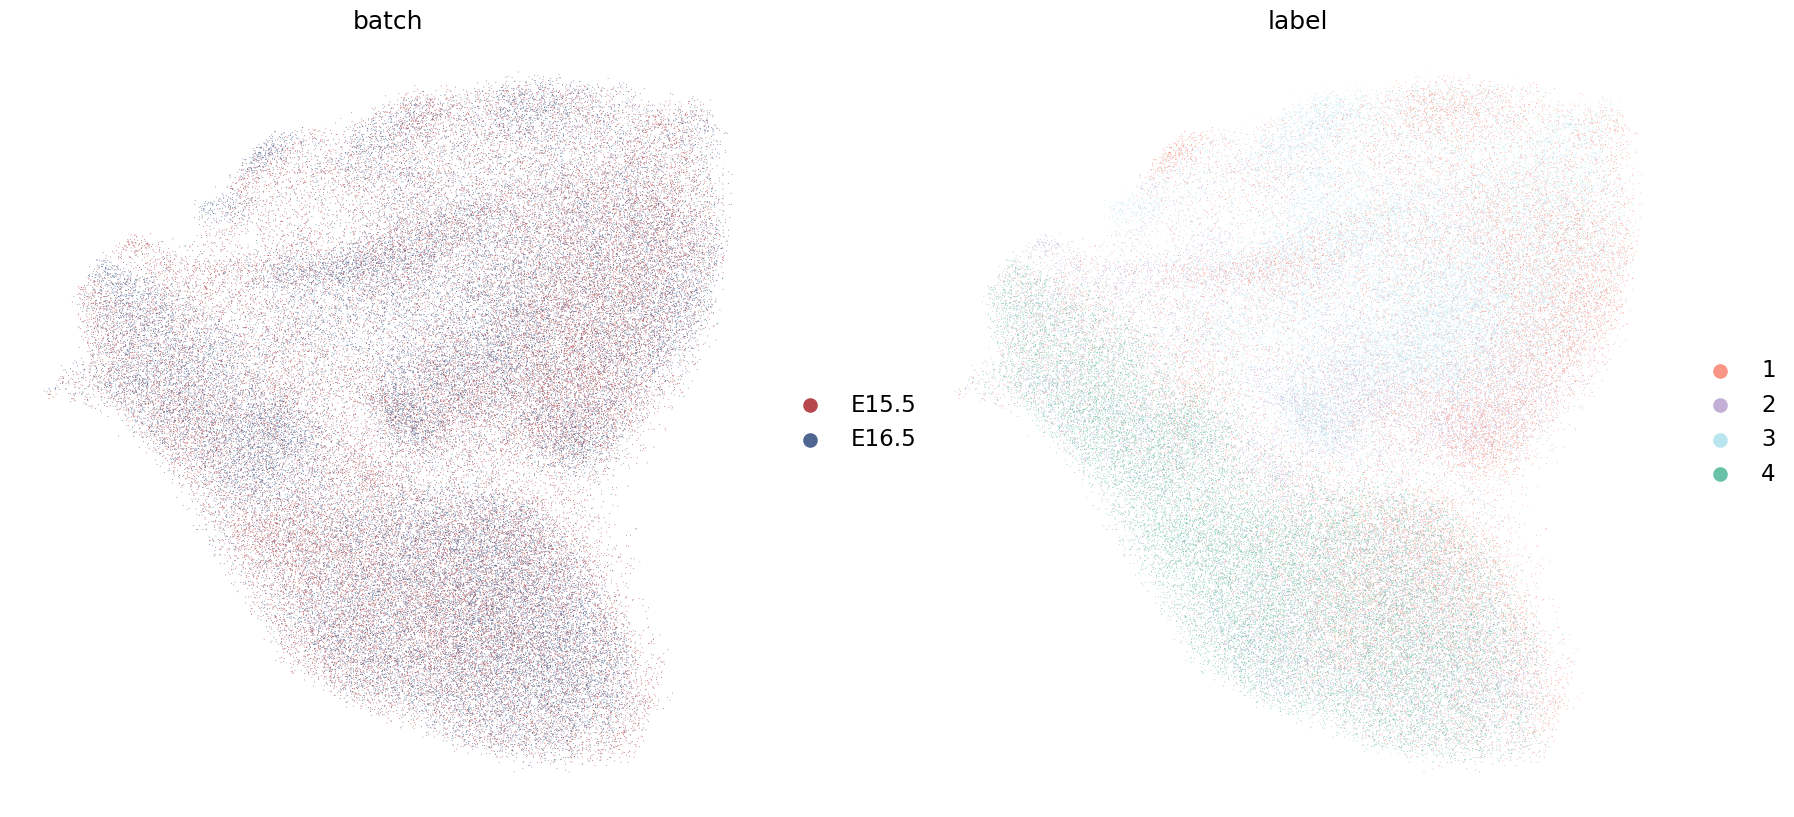

/data/civy/miniconda3/lib/python3.10/site-packages/scanpy-1.9.3-py3.10.egg/scanpy/plotting/_tools/scatterplots.py:163: PendingDeprecationWarning: The get_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/data/civy/miniconda3/lib/python3.10/site-packages/scanpy-1.9.3-py3.10.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/data/civy/miniconda3/lib/python3.10/site-packages/scanpy-1.9.3-py3.10.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


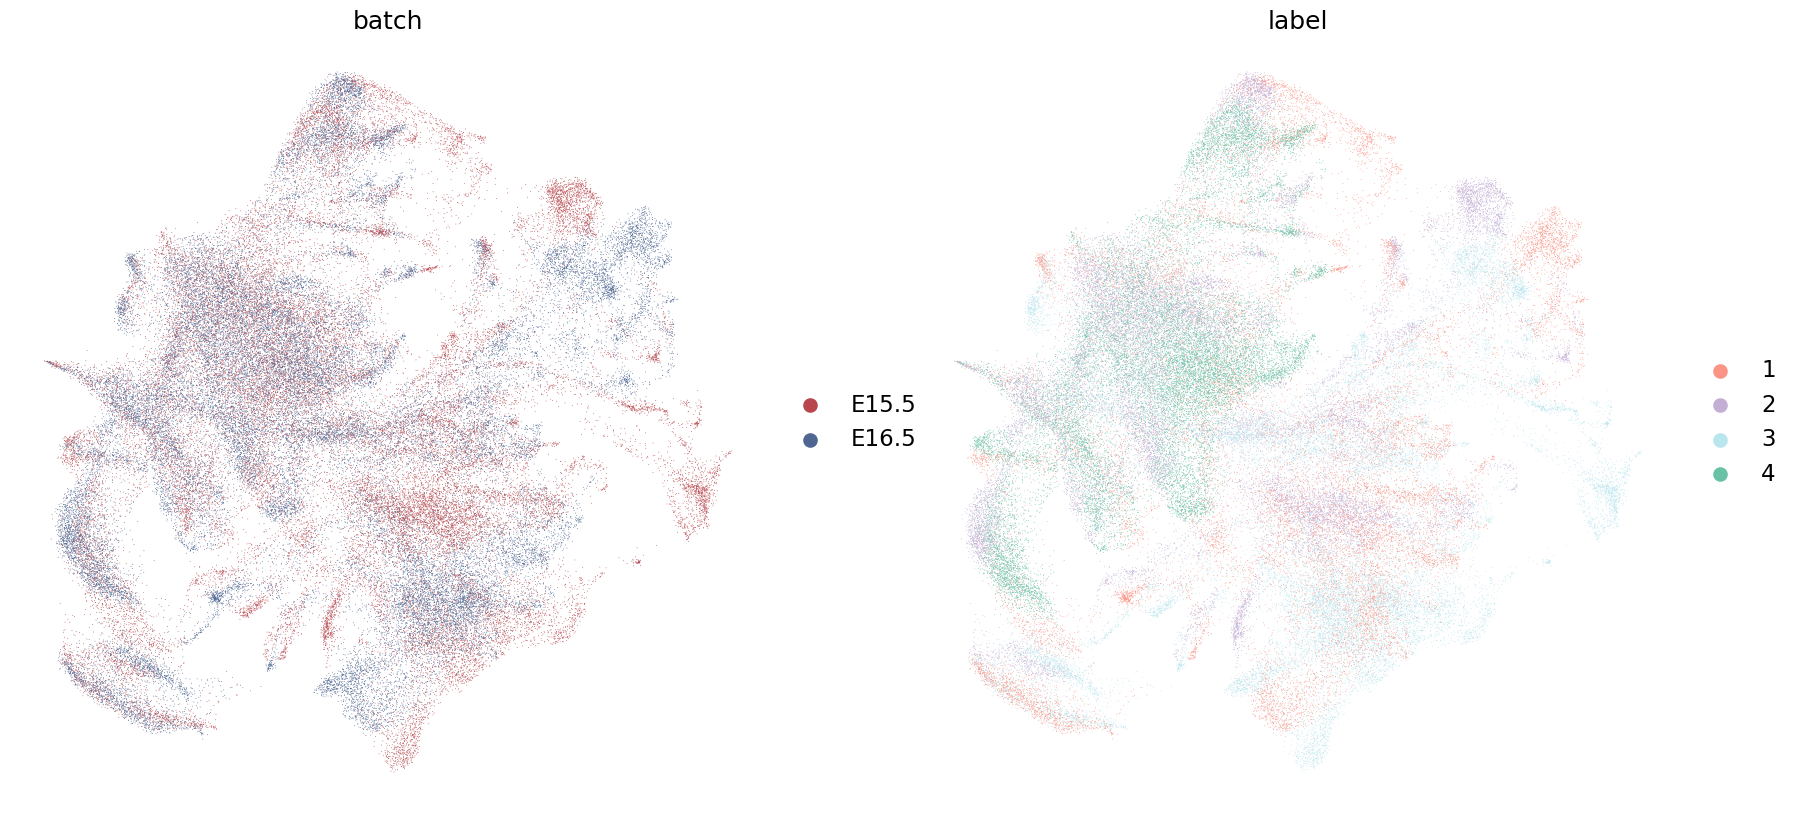

In [25]:
color_map = {'1': '#FA9485', '2':'#C3AED5', '3': '#B9E5EE', '4': '#69C2A6', 'E15.5': '#B8474D', 'E16.5': '#4E6691'}
with plt.rc_context({"figure.figsize": (10, 10)}):

    sc.pp.neighbors(adata_20, use_rep='X_pca_harmony')
    sc.tl.umap(adata_20)
    axes = sc.pl.umap(adata_20, color=['batch', 'label'], show=False, palette=color_map)
    for ax in axes:
        for spine in ax.spines.values():
            spine.set_visible(False)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
    plt.show()
    
    sc.pp.neighbors(adata_full, use_rep='X_pca_harmony')
    sc.tl.umap(adata_full)
    axes = sc.pl.umap(adata_full, color=['batch', 'label'], show=False, palette=color_map)
    for ax in axes:
        for spine in ax.spines.values():
            spine.set_visible(False)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
    plt.show()

In [132]:
np.save('ari_fig3', ari_list)
np.save('nmi_fig3', nmi_list)
np.save('gc_fig3', gc_list)
np.save('sb_fig3', sb_list)
np.save('ig_fig3', ig_list)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


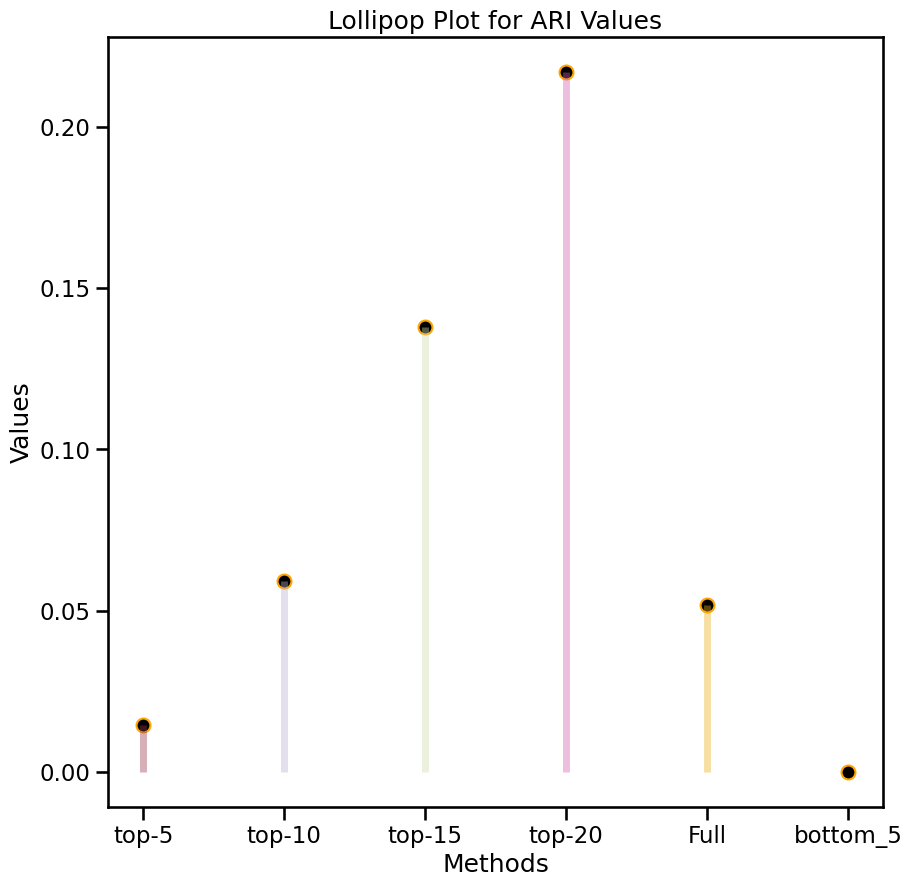

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


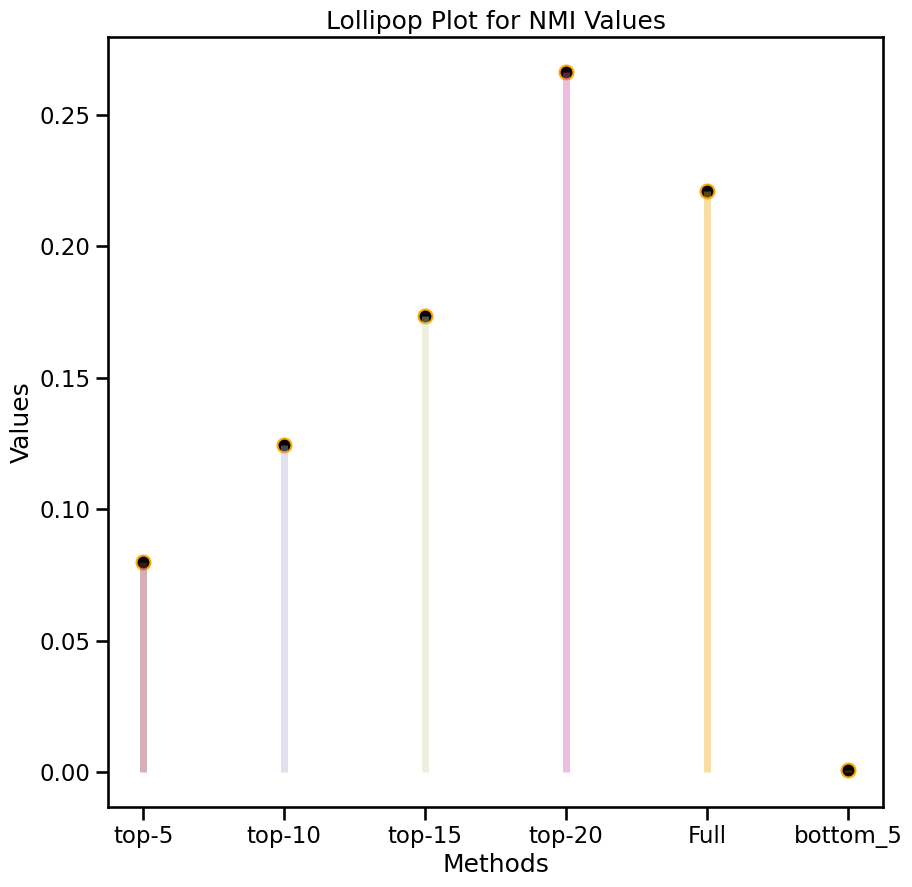

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


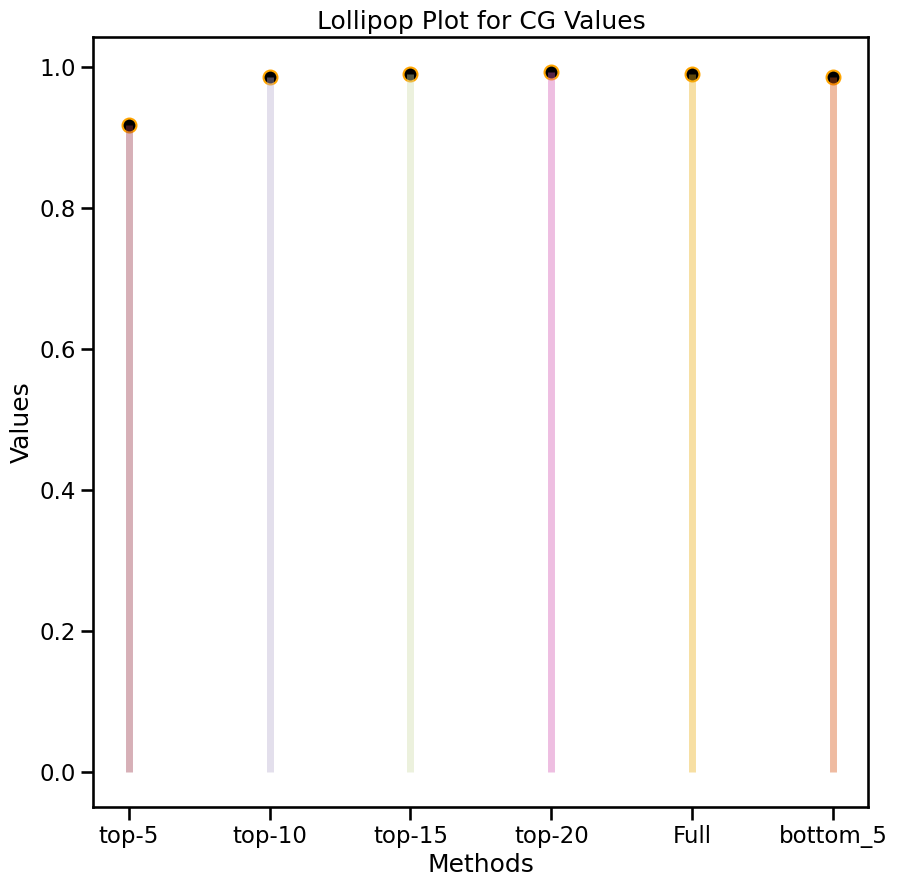

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


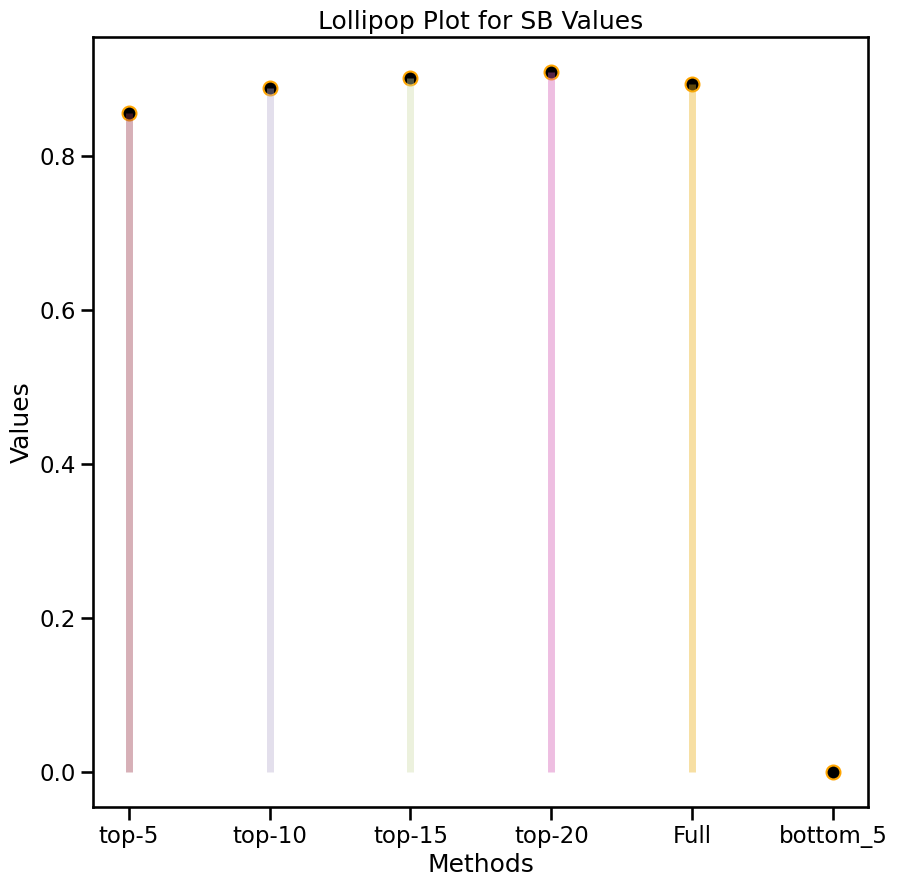

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


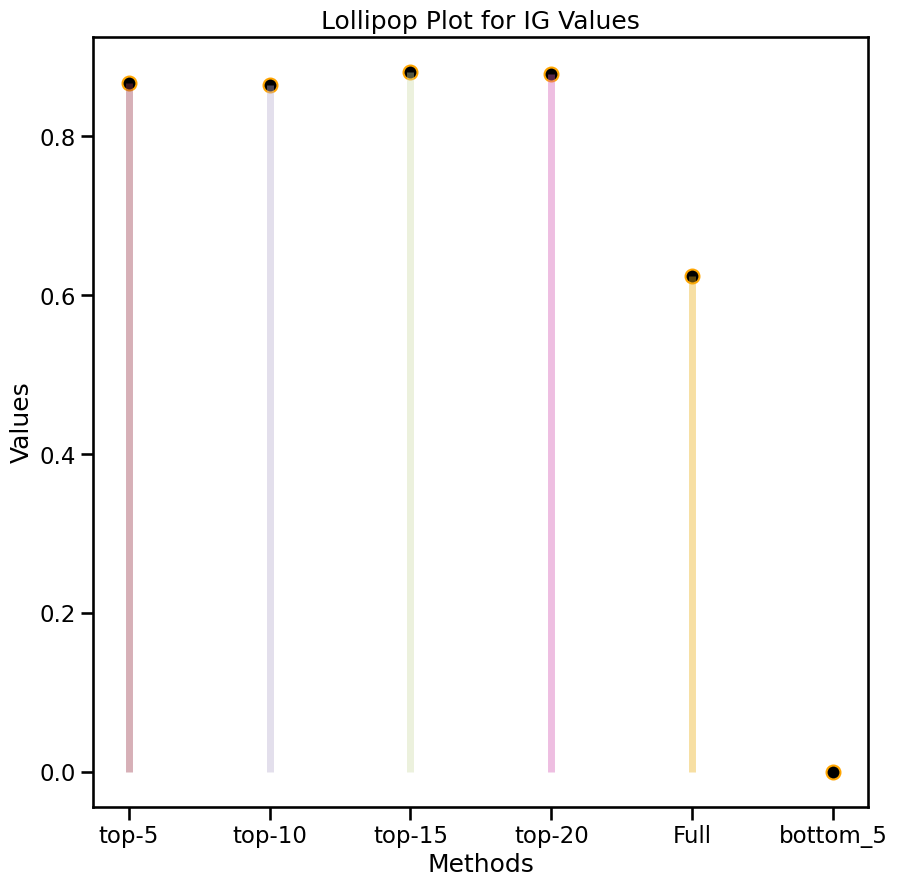

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Defining the method names and loading the data
methods = ['top-5', 'top-10', 'top-15', 'top-20', 'Full', 'bottom_5']
colors = ['blue', 'green', 'red', 'purple', 'brown', 'pink']  # Different colors for each stem

colors = ['#9B3A4D', '#BAAFD1', '#D0DCAA', '#D55EB6', '#EDB11A', '#D75515']

with plt.rc_context({"figure.figsize": (10, 10)}):
    # Plot each set of values
    for i, (data_file, title) in enumerate(zip(['ari_fig3.npy', 'nmi_fig3.npy', 'gc_fig3.npy', 'sb_fig3.npy', 'ig_fig3.npy',],
                                ['ARI Values', 'NMI Values', 'CG Values','SB Values', 'IG Values' ])):
        values = np.load(data_file)
        values[-1], values[-2] = values[-2], values[-1]
        
        index = np.argmax(values)
        x = np.arange(values.shape[0])
        y = values
        plt.vlines(x=x, ymin=0, ymax=y, color=colors, alpha=0.4, linewidth=5)
        plt.scatter(x, y, color='black', s=100, alpha=1, marker='o', edgecolors='orange')

        # Adding labels and title
        plt.xlabel('Methods')
        plt.ylabel('Values')
        plt.xticks(x, methods)
        plt.title(f'Lollipop Plot for {title}')
        plt.show()
